<a href="https://colab.research.google.com/github/cut-lip/ML_FirstNeuralNetwork/blob/main/ML_FirstNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Nicholas Cutlip
# Train a neural network to identify articles of clothing
# Adapted from: https://www.tensorflow.org/tutorials/keras/classification

# Import TensorFlow and tf.keras
import tensorflow as tf

# Import Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Print current version of TensorFlow
print(tf.__version__)

2.9.2


This data consists of image data from the MNIST fashion dataset. Images are 28 x 28 pixels, with a range of values from 0 to 255.

In [27]:
# Import MNIST fashion dataset (through keras)
fashion_mnist = tf.keras.datasets.fashion_mnist

# Training set (data the model uses to learn) and testing set (model is tested against)
# Returns four numpy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [28]:
# Image data is 28 x 28 NumPy arrays, pixel values range from 0 to 255
# Labels range from 0 to 9, each identifying a different article of clothing
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
# Display parameters of training data
train_images.shape

(60000, 28, 28)

In [30]:
# Display the number of training labels
len(train_labels)

60000

In [31]:
# Display labels
train_labels



array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
# Display parameters of test data
test_images.shape

(10000, 28, 28)

In [33]:
# Display the number of test labels
len(test_labels)

10000

We must now PREPROCESS the data, as follows:

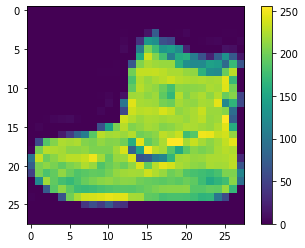

In [34]:

# Visualize the first image to understand the dimensions and gradient
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

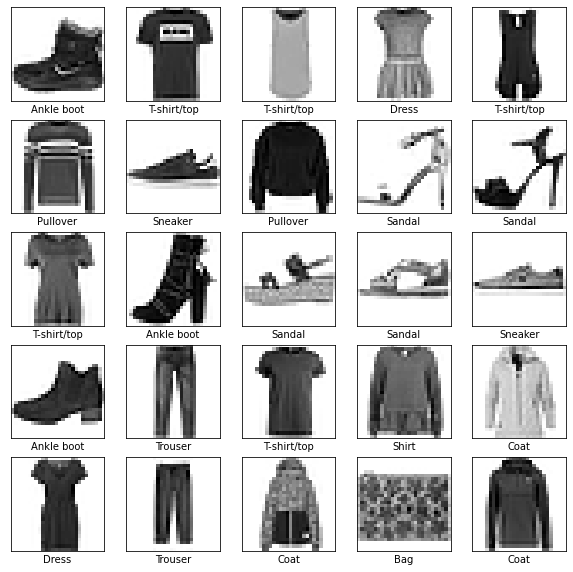

In [35]:
# Scale the values of the data points (images) to the interval [0, 1] by dividing them by n
train_images = train_images / 255.0

test_images = test_images / 255.0

# Plot a subset of the data to verify it is in the correct formal for training the network
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Now that we have confirmed the data is in the desired format, we may build our neural network.

In [37]:
# A neural network consists of LAYERS, which extract representations from the data they are trained on.
# The goal is for these representations to be relevant to the current classification.

model = tf.keras.Sequential([
    
    # Data is laid out in one dimension (think array, sequential)
    tf.keras.layers.Flatten(input_shape = (28, 28)),

    # A dense layer is a neural network layer where every neuron recieves input from all the neurons of the previous layer
    tf.keras.layers.Dense(128, activation = 'relu'),

    # This last layer will return a "logits" vector. This is the non-normalizd predictions generated by the model
    # In multi-class classification, the logits vector will generally become input to the softmax function, which normalizes to one value
    # Each node of this length 10 array contains the likelihood of an image belonging to a certain class
    tf.keras.layers.Dense(10)
])


# We may now compile the model, while simultaneuosly adjusting other model settings


model.compile(optimizer = 'adam',                           # Optimizer adjusts model based on context of training
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),  # Loss function measures accuracy of model during training
              metrics = ['accuracy'])                       # Metric is used to moniter training and testing

The ML Neural Network Classification Model is now ready for training, after being compiled and set-up.

In [54]:
# Training commences by feeding the training data into the model

# Fit the model to the training data
model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2307 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2239 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2171 - accuracy: 0.9172
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2105 - accuracy: 0.9215
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2030 - accuracy: 0.9245
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1994 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1939 - accuracy: 0.9268
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1884 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1852 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.179

In [39]:
# We should now evaluate how accurate the model is on the test images

# Call Evaluate on the model with the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3398 - accuracy: 0.8822 - 577ms/epoch - 2ms/step

Test accuracy: 0.8822000026702881


Upon testing the model, we find that the model has a lower accuracy for the testing data than it did for the training data. This indicates that the model is OVERFITTING the data, gleaning too many unhelpful details from the training data.

We may now normalize the output of the model as described above, using the softmax function, in order to cause it to return a simple prediction for an image (rather than a vector of logits).

In [42]:
# Normalize the output of the model with a Softmax layer
# (look into - this isn't quite probability, but look-alike)
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Print the first prediction to see its format
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.0767631e-07, 1.2368327e-10, 2.0408091e-08, 8.6607954e-10,
       9.0708108e-10, 1.3195369e-02, 8.7738335e-06, 3.5187313e-03,
       2.6306330e-07, 9.8327672e-01], dtype=float32)

In [43]:
# Print the first prediction's highest confidence label
np.argmax(predictions[0])

9

In [44]:
# If we take a look at the label for the first test image, we see that the model's prediction is correct
test_labels[0]

9

It is worthwhile to take a closer look at the output of the analysis, including the 

In [47]:
# Function to plot a given image and the accuracy of its prediction
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  # If the prediction is correct, blue label.
  # If the prediction is incorrect, red label.
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [49]:
# Plot the value array for a given data point
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  # Plot a bar graph of the prediction values
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

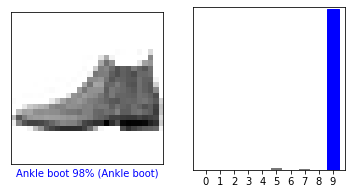

In [50]:
# Plot the first test image and its prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

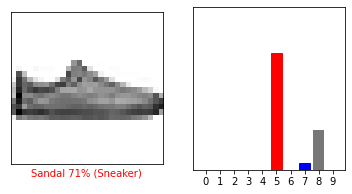

In [51]:
# Plot an incorrect prediction
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

As we can see, the model is a little problematic in that it has a rather high rate of confidence (71%) for an incorrect prediction

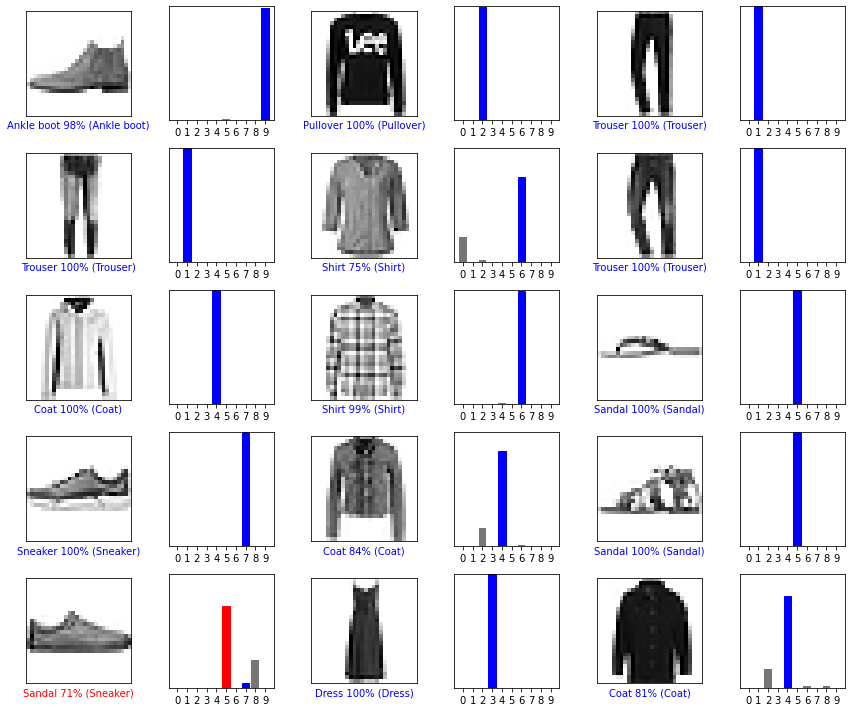

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

It is useful to practice using the model we have trained to predict the class of a single data point (image). Since Keras models are designed to work on batches of data points, we should add the single image we wish to classify to a list.

In [55]:
# Obtain a single test image

img = test_images[1]


# Construct a list containing a single image

img = (np.expand_dims(img, 0))

# Now we can pass this list to the model for it to make a prediction on the image

single_prediction = probability_model.predict(img)
print(single_prediction)

1/1 [==============================] - 0s 18ms/step
[[6.9116999e-05 5.4717301e-22 9.9981517e-01 5.8891758e-10 1.1184398e-04
  3.8623601e-15 3.9629072e-06 4.2396226e-17 4.8076468e-15 4.0000733e-15]]


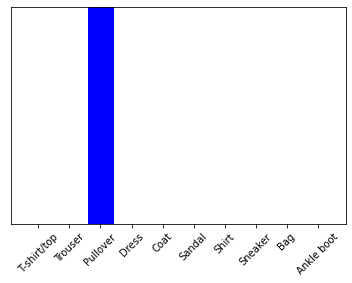

In [56]:
# Plot the analyzed image and its prediction array

plot_value_array(1, single_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()